# **PROJET 6 DATA ANALYST**

Analysez les ventes d'une librairie avec Python

SOMMAIRE :

ETAPE 1 - Importation des libraires et chargement des fichiers

Etape 2 - Analyse exploratoire des fichiers

Etape 3 - Jointure

Etape 4 - Analyse du dataframe merge_df

Etape 5 - Analyse des ventes

Etape 6 - Analyse des clients

Etape 7 - Analyse des corrélations et tests statistiques

Etape 8 - Conclusions

## **Etape 1 - Importation des librairies et chargement des fichiers**

In [223]:
#Accès au google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.1 - Importation des librairies**

In [224]:
#Importation de la librairie Pandas, matplotlib
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import time
import re
from datetime import datetime as dt

**1.2 - Chargement des fichiers CSV**

In [225]:
#Importation du fichier liaison.csv
customers_csv ='/content/drive/MyDrive/Herbet_Thomas_P6/customers.csv'
customers = pd.read_csv(customers_csv, sep=';')

#Importation du fichier erp.csv
products_csv ='/content/drive/MyDrive/Herbet_Thomas_P6/products.csv'
products = pd.read_csv(products_csv, sep=';')

#Importation du fichier web.csv
transactions_csv ='/content/drive/MyDrive/Herbet_Thomas_P6/Transactions.csv'
transactions = pd.read_csv(transactions_csv, sep=';')


## **Etape 2 - Analyse exploratoire des fichiers**

**2.1 - Analyse exploratoire du fichier customers**

In [226]:
#Afficher les dimensions du dataset
print('Il y a :', customers.shape[0], 'lignes')

Il y a : 8621 lignes


In [227]:
from tables.table import Column
#Consulter le nombre de colonnes
print('Il y a :', customers.shape[1], 'colonnes.')

Il y a : 3 colonnes.


In [228]:
#La nature des données dans chacune des colonnes
print(f"La nature des données est : {(customers.dtypes)}")

La nature des données est : client_id    object
sex          object
birth         int64
dtype: object


In [229]:
#Recherche de valeurs manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [230]:
#Recherche de doublons
customers["client_id"].duplicated().sum()

0

In [231]:
#Affichage des valeurs uniques
customers["sex"].unique()

array(['f', 'm'], dtype=object)

In [232]:
#Nombre de femme et d'hommes
customers["sex"].value_counts()

f    4490
m    4131
Name: sex, dtype: int64

In [233]:
#Années de naissance
customers["birth"].sort_values().unique()

array([1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004])

In [234]:
#Calcul de l'âge
customers["age"] = 2023 - customers["birth"]

In [235]:
#Calcul de l'âge moyen
print("Les clients ont en moyenne", round(customers["age"].mean()), "ans.")

Les clients ont en moyenne 45 ans.


In [236]:
#Définition de l'âge de départ pour consituter les groupe
age_bins = [18, 29, 39, 49, 59, 69,94]

# Définir les labels pour chaque groupe d'âge
age_labels = ['19-29', '30-39', '40-49', '50-59', '60-69','70-94']

# Ajouter une nouvelle colonne 'age_group' au DataFrame customers
customers['groupe_age'] = pd.cut(customers['age'], bins=age_bins, labels=age_labels)

#customers = customers.drop(columns=['age'])

In [237]:
#Describe de liaison
customers.describe()

,birth,age
count,8621.000000,8621.000000
mean,1978.275606,44.724394
std,16.917958,16.917958
min,1929.000000,19.000000
25%,1966.000000,31.000000
50%,1979.000000,44.000000
75%,1992.000000,57.000000
max,2004.000000,94.000000


In [238]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"La nombre de valeurs présentes dans chacune des colonnes est : {(customers.count())}")

La nombre de valeurs présentes dans chacune des colonnes est : client_id     8621
sex           8621
birth         8621
age           8621
groupe_age    8621
dtype: int64


In [239]:
#Affichage les 5 premières lignes de la table
customers.head()

,client_id,sex,birth,age,groupe_age
0,c_4410,f,1967,56,50-59
1,c_7839,f,1975,48,40-49
2,c_1699,f,1984,39,30-39
3,c_5961,f,1962,61,60-69
4,c_5320,m,1943,80,70-94


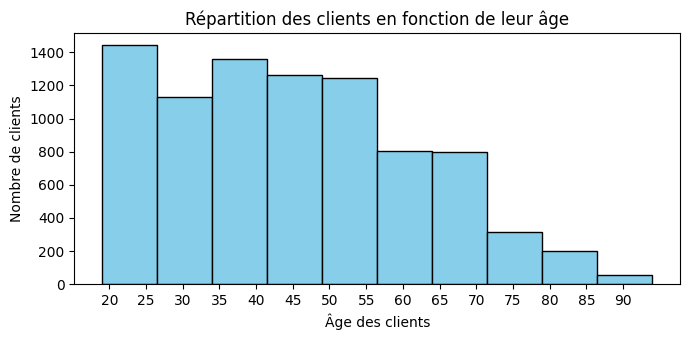

In [240]:
#Création du graphique
from re import X
plt.hist(data=customers, x='age', color='skyblue', edgecolor='black')
plt.title("Répartition des clients en fonction de leur âge")
plt.xlabel("Âge des clients")
plt.ylabel("Nombre de clients")
xlabel = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
plt.xticks(xlabel)
plt.show()

**2.2 - Analyse exploratoire du fichier products**

In [241]:
#Afficher les dimensions du dataset
print('Il y a :', products.shape[0], 'lignes')

Il y a : 3286 lignes


In [242]:
#Consulter le nombre de colonnes
print('Il y a :', products.shape[1], 'colonnes.')

Il y a : 3 colonnes.


In [243]:
#La nature des données dans chacune des colonnes
print(f"La nature des données est : {(products.dtypes)}")

La nature des données est : id_prod     object
price      float64
categ        int64
dtype: object


In [244]:
#Recherhce de valeurs manquantes
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [245]:
#Recherche des valeurs uniques
products["categ"].unique()

array([0, 1, 2])

In [246]:
#Describe de liaison
products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [247]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"La nombre de valeurs présentes dans chacune des colonnes est : {(products.count())}")

La nombre de valeurs présentes dans chacune des colonnes est : id_prod    3286
price      3286
categ      3286
dtype: int64


In [248]:
#Affichage des 5 premières lignes de la table
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [249]:
#Calcul des Quartiles et de l'écart interquartile
q1 = np.percentile(products["price"], 25)
q2 = np.percentile(products["price"], 50)
q3 = np.percentile(products["price"], 75)
iqr = q3-q1
print(f"1er quartile = {q1} €",f"2ème quartile = {q2} €", f"3ème quartile {q3} €", f"Intervalle interquatile est", round(iqr,2), "€.")

1er quartile = 6.99 € 2ème quartile = 13.075 € 3ème quartile 22.99 € Intervalle interquatile est 16.0 €.


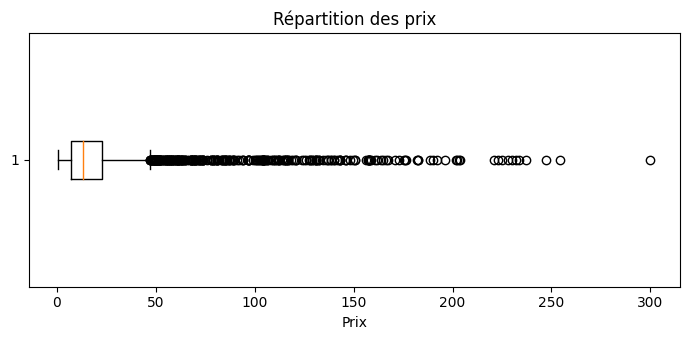

In [250]:
#Création du graphique en boîte à moustache
plt.boxplot(data=products, x="price", vert=False)
plt.title("Répartition des prix")
plt.xlabel("Prix")
plt.show()

In [251]:
#Intervalle de confiance fixée à 95%
outliers = q3 + 1.96*iqr
print(f"Les prix supérieur à :", round(outliers,2), "€ sont considérés comme aberrantes.")

Les prix supérieur à : 54.35 € sont considérés comme aberrantes.


In [252]:
#Définition de la largeur des barres
largeur_bar = (2 * iqr) / (len(products) ** (1 / 3))
nb_bar = int(np.ceil((products["price"].max() - products["price"].min()) / largeur_bar))

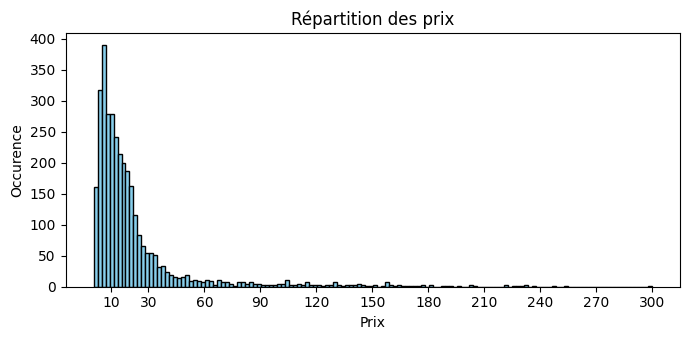

In [253]:
#Création du graphique
plt.hist(data=products, x="price", bins=nb_bar, color='skyblue', edgecolor='black')
plt.title("Répartition des prix")
label_x = [10, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
plt.xticks(label_x)
plt.xlabel("Prix")
plt.ylabel("Occurence")
plt.show()

**2.3 - Analyse exploratoire du fichier transactions**

In [254]:
#Afficher les dimensions du dataset
print('Il y a :', transactions.shape[0], 'lignes')

Il y a : 687534 lignes


In [255]:
#Consulter le nombre de colonnes
print('Il y a :', transactions.shape[1], 'colonnes.')

Il y a : 4 colonnes.


In [256]:
#La nature des données dans chacune des colonnes
print(f"La nature des données est : {(transactions.dtypes)}")

La nature des données est : id_prod       object
date          object
session_id    object
client_id     object
dtype: object


In [257]:
#Describe de transactions
transactions.describe()

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


In [258]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"La nombre de valeurs présentes dans chacune des colonnes est : {(transactions.count())}")

La nombre de valeurs présentes dans chacune des colonnes est : id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64


In [259]:
#Affichage les 5 premières lignes de la table
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [260]:
# Sélectionnez les lignes contenant ' 24:' dans la colonne 'date'
transactions_with_24_hour = transactions[transactions['date'].str.contains(' 24:')]

# Remplacement ' 24:' par ' 00:' dans la colonne 'date' uniquement pour les lignes avec ' 24:'
transactions.loc[transactions_with_24_hour.index, 'date'] = transactions_with_24_hour['date'].str.replace(' 24:', ' 00:')

# Convertion la colonne 'date' en format datetime
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S.%f')



In [261]:
#Vérification des valeur date au format 24 heures
transactions.loc[transactions['date'] == ' 24:']


,id_prod,date,session_id,client_id


In [262]:
#Découpage de la date en année, mois et jour
transactions['Année']=transactions['date'].dt.to_period('Y')
transactions['Mois']=transactions['date'].dt.to_period('M')
transactions['Jour']=transactions['date'].dt.to_period('D')

In [263]:
# Convertir la colonne en objets datetime
transactions['date'] = pd.to_datetime(transactions['date'])

# Convertir les objets datetime en timestamp et stocker les résultats dans une nouvelle colonne 'timestamp'
transactions['timestamp'] = transactions['date'].apply(lambda x: pd.Timestamp(x).timestamp())

# Afficher le DataFrame avec la nouvelle colonne 'timestamp'
transactions

,id_prod,date,session_id,client_id,Année,Mois,Jour,timestamp
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,2021-03,2021-03-01,1.614557e+09
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,2021-03,2021-03-01,1.614557e+09
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021,2021-03,2021-03-01,1.614557e+09
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021,2021-03,2021-03-01,1.614557e+09
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021,2021-03,2021-03-01,1.614557e+09
...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023,2023-02,2023-02-28,1.677628e+09
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023,2023-02,2023-02-28,1.677628e+09
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023,2023-02,2023-02-28,1.677628e+09
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023,2023-02,2023-02-28,1.677629e+09


## **Etape 3 - Jointure**

In [264]:
#Jointure des dataframes
merge_df = transactions.merge(customers, on='client_id', how='inner').merge(products, on='id_prod', how='inner')

In [265]:
#Affichage du merge
merge_df

,id_prod,date,session_id,client_id,Année,Mois,Jour,timestamp,sex,birth,age,groupe_age,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,2021-03,2021-03-01,1.614557e+09,f,1967,56,50-59,11.99,0
1,0_1259,2022-10-01 00:01:07.843138,s_275943,c_329,2022,2022-10,2022-10-01,1.664582e+09,f,1967,56,50-59,11.99,0
2,0_1259,2022-12-01 00:01:07.843138,s_305291,c_329,2022,2022-12,2022-12-01,1.669853e+09,f,1967,56,50-59,11.99,0
3,0_1259,2023-01-01 00:01:07.843138,s_320153,c_329,2023,2023-01,2023-01-01,1.672531e+09,f,1967,56,50-59,11.99,0
4,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,2021,2021-03,2021-03-04,1.614843e+09,m,1980,43,40-49,11.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,2022,2022-02,2022-02-19,1.645282e+09,m,1993,30,30-39,86.99,2
687530,0_807,2021-07-24 17:43:23.555852,s_66634,c_8273,2021,2021-07,2021-07-24,1.627149e+09,m,1991,32,30-39,1.99,0
687531,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,2021,2021-09,2021-09-26,1.632639e+09,m,1945,78,70-94,35.24,1
687532,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,2022,2022-11,2022-11-26,1.669446e+09,m,1945,78,70-94,35.24,1


## **Etape 4 - Analyse du dataframe merge_df**

In [266]:
#Afficher les dimensions du dataset
print('Il y a :', merge_df.shape[0], 'lignes')

Il y a : 687534 lignes


In [267]:
#Consulter le nombre de colonnes
print('Il y a :', merge_df.shape[1], 'colonnes.')

Il y a : 14 colonnes.


In [268]:
#La nature des données dans chacune des colonnes
print(f"La nature des données est : {(merge_df.dtypes)}")

La nature des données est : id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
Année          period[A-DEC]
Mois               period[M]
Jour               period[D]
timestamp            float64
sex                   object
birth                  int64
age                    int64
groupe_age          category
price                float64
categ                  int64
dtype: object


In [269]:
#Describe de transactions
merge_df.describe()

,timestamp,birth,age,price,categ
count,6.875340e+05,687534.000000,687534.000000,687534.000000,687534.000000
mean,1.646170e+09,1977.817391,45.182609,17.493918,0.448789
std,1.802605e+07,13.607935,13.607935,18.238337,0.594563
min,1.614557e+09,1929.000000,19.000000,0.620000,0.000000
25%,1.631270e+09,1970.000000,36.000000,8.990000,0.000000
50%,1.645945e+09,1980.000000,43.000000,13.990000,0.000000
75%,1.661725e+09,1987.000000,53.000000,19.080000,1.000000
max,1.677629e+09,2004.000000,94.000000,300.000000,2.000000


In [270]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"La nombre de valeurs présentes dans chacune des colonnes est : {(merge_df.count())}")

La nombre de valeurs présentes dans chacune des colonnes est : id_prod       687534
date          687534
session_id    687534
client_id     687534
Année         687534
Mois          687534
Jour          687534
timestamp     687534
sex           687534
birth         687534
age           687534
groupe_age    687534
price         687534
categ         687534
dtype: int64


In [271]:
#Recherche de valeurs manquantes
merge_df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
Année         0
Mois          0
Jour          0
timestamp     0
sex           0
birth         0
age           0
groupe_age    0
price         0
categ         0
dtype: int64

## **Etape 5 - Analyse des ventes**

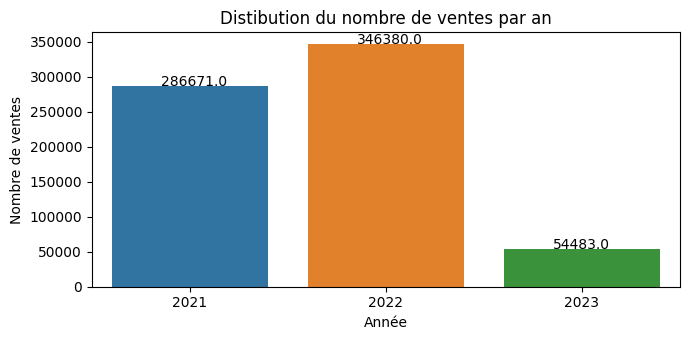

In [272]:
#Création du graphique
import seaborn as sns
#Paramétrage de la figure et des axes
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

#Réalisation du graphique
ax = sns.countplot(x=merge_df["Année"], data=merge_df['price'])

#Légende pour chaque barre
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#Titre des axes
plt.title("Distibution du nombre de ventes par an")
plt.ylabel("Nombre de ventes")

#Affichage du graphique
plt.show()

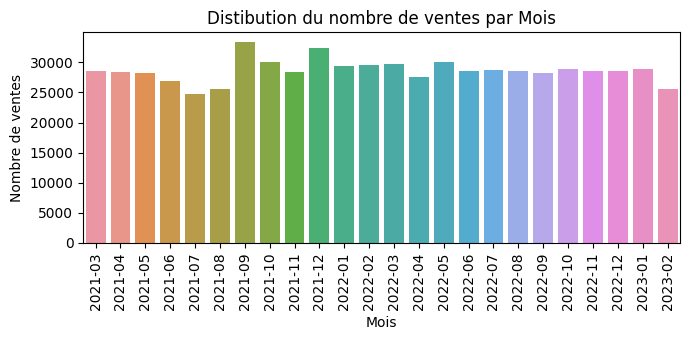

In [273]:
#Paramétrage de la figure et des axes
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

#Trie des valeurs par la date
merge_df.sort_values('date', inplace=True)

#Réalisation du graphique
ax = sns.countplot(x=merge_df["Mois"], data=merge_df['price'])

#Titre des axes
plt.title("Distibution du nombre de ventes par Mois")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=90)

#Affichage du graphique
plt.show()

In [274]:
# Calculer le chiffre d'affaires
chiffre_affaires = merge_df['price'].sum()

# Afficher le chiffre d'affaires avec séparation des milliers
print("Le chiffre d'affaires depuis le début du magasin en ligne est de : {} €".format("{:,.2f}".format(chiffre_affaires)))


Le chiffre d'affaires depuis le début du magasin en ligne est de : 12,027,663.10 €


In [275]:
#Copie du dataframe
chiffre_affaires_df = merge_df[['Année','price']].copy()

#Calcul du CA
chiffre_affaires_df = chiffre_affaires_df.groupby('Année').sum()

#Indexation sur l'année
Année = chiffre_affaires_df.index

#Affichage en Kilo €
ca = round(chiffre_affaires_df['price']/1000,2)

#Boucle for pour affiche du CA par an
for Année, ca in zip(Année, ca):
  print(f'En {Année}, le CA est de : ', ca,"k €")

En 2021, le CA est de :  4944.76 k €
En 2022, le CA est de :  6108.68 k €
En 2023, le CA est de :  974.22 k €


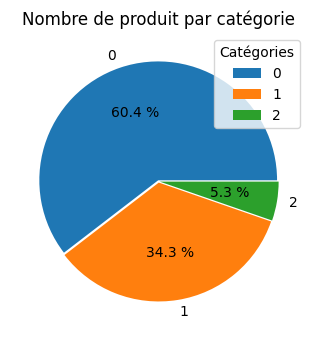

In [276]:
#Création d'une figure et un ensemble d'axes
fig, ax = plt.subplots()

#Données pour le diagramme circulaire
pie_data = merge_df.groupby('categ')['id_prod'].count()

#Traçage le diagramme circulaire
ax.pie(pie_data, labels=pie_data.index, autopct='%.1f %%', explode=[0.01]*3)

#Ajout d'une légende
ax.legend(pie_data.index, title='Catégories', loc='best')

#Ajout d'un titre
plt.title("Nombre de produit par catégorie")

#Affichage du graphique
plt.show()


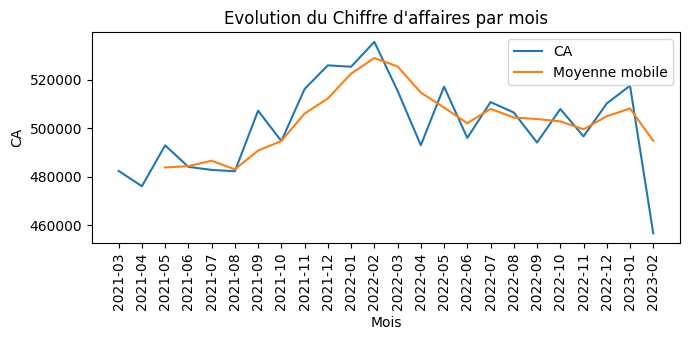

In [277]:
#Données pour le graphique
ca_df = merge_df.groupby('Mois', as_index=False)['price'].agg(['count','sum']).reset_index()

ca_df.rename(columns={'count':'quantité','sum':'CA'}, inplace=True)

#Calcul de la moyenne mobile
ca_df['mva']= ca_df['CA'].rolling(3).mean()

#Convertion au format texte de la colonne 'Mois'
X = ca_df['Mois'].astype(str)

#Réalisation du graphique
sns.lineplot(data=ca_df, x=X, y='CA', estimator=sum, label='CA')
sns.lineplot(data=ca_df, x=X, y='mva', estimator=sum, label='Moyenne mobile')

#Titre du graphique
plt.title("Evolution du Chiffre d'affaires par mois")
plt.xticks(rotation=90)

#Affichage du graphique
plt.show()


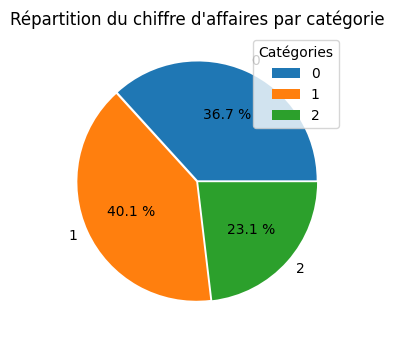

In [278]:
#Données pour le graphique
ca_produit_df = merge_df.groupby('categ', as_index=False)['price'].agg(['count', 'sum']).reset_index()

ca_produit_df.rename(columns={'count': 'quantité', 'sum': 'CA'}, inplace=True)

#Réalisation du graphique
plt.pie(ca_produit_df['CA'], labels = ca_produit_df['categ'], autopct='%.1f %%', explode=[0.01]*3)

#Paramétrage du titre et des légendes
plt.legend(pie_data.index, title='Catégories', loc='best')

plt.title("Répartition du chiffre d'affaires par catégorie")

#Affichage du graphique
plt.show()


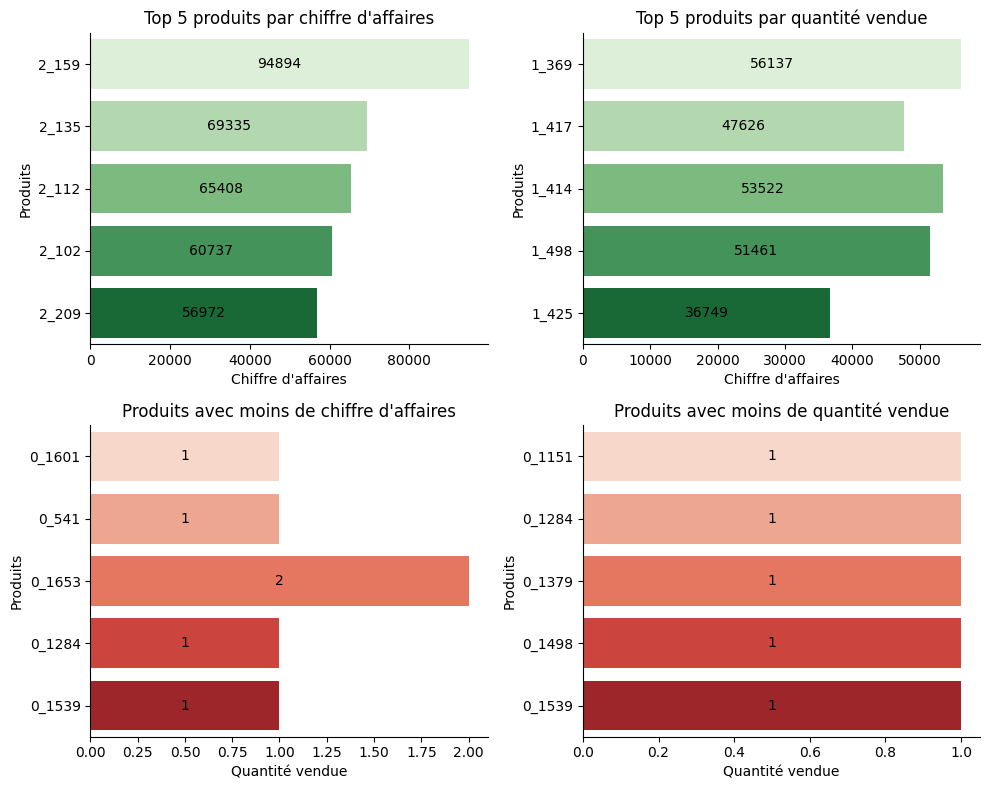

In [279]:
#Données pour la graphique
df = merge_df.copy()

df_result = df.groupby(['categ', 'id_prod']).agg(quantité=('id_prod', 'count'), ca=('price', 'sum')).reset_index()

df_result = df_result.loc[df_result['id_prod'].str[:1] == df_result['categ'].astype('string')]

df_1 = df_result.nlargest(5,'ca').sort_values(by="ca", ascending=False )
df_2 = df_result.nsmallest(5,'ca').sort_values(by="ca", ascending=False)
df_3 = df_result.nlargest(5,'quantité').sort_values(by="quantité", ascending=False)
df_4 = df_result.nsmallest(5,'quantité').sort_values(by="quantité", ascending=False)

# Création de la figure et des sous-graphiques avec Seaborn
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Tracé des graphiques à barres horizontales avec Seaborn en utilisant les palettes de couleurs
sns.barplot(x='ca', y='id_prod', data=df_1, ax=axs[0, 0], palette='Greens')
sns.barplot(x='quantité', y='id_prod', data=df_2, ax=axs[1, 0], palette='Reds')
sns.barplot(x='ca', y='id_prod', data=df_3, ax=axs[0, 1], palette='Greens')
sns.barplot(x='quantité', y='id_prod', data=df_4, ax=axs[1, 1], palette='Reds')

# Étiquetage des axes et affichage du titre
axs[0, 0].set_xlabel('Chiffre d\'affaires')
axs[0, 0].set_ylabel('Produits')
axs[0, 0].set_title('Top 5 produits par chiffre d\'affaires')

axs[1, 0].set_xlabel('Quantité vendue')
axs[1, 0].set_ylabel('Produits')
axs[1, 0].set_title('Produits avec moins de chiffre d\'affaires')

axs[0, 1].set_xlabel('Chiffre d\'affaires')
axs[0, 1].set_ylabel('Produits')
axs[0, 1].set_title('Top 5 produits par quantité vendue')

axs[1, 1].set_xlabel('Quantité vendue')
axs[1, 1].set_ylabel('Produits')
axs[1, 1].set_title('Produits avec moins de quantité vendue')

# Ajout des étiquettes de données au-dessus des barres
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2),
                    ha='center', va='center', xytext=(0, 0), textcoords='offset points')

#Suppression de l'encadrement noir
sns.despine()

# Affichage du graphique
plt.tight_layout()
plt.show()

## **Etape 6 - Analyse des clients**

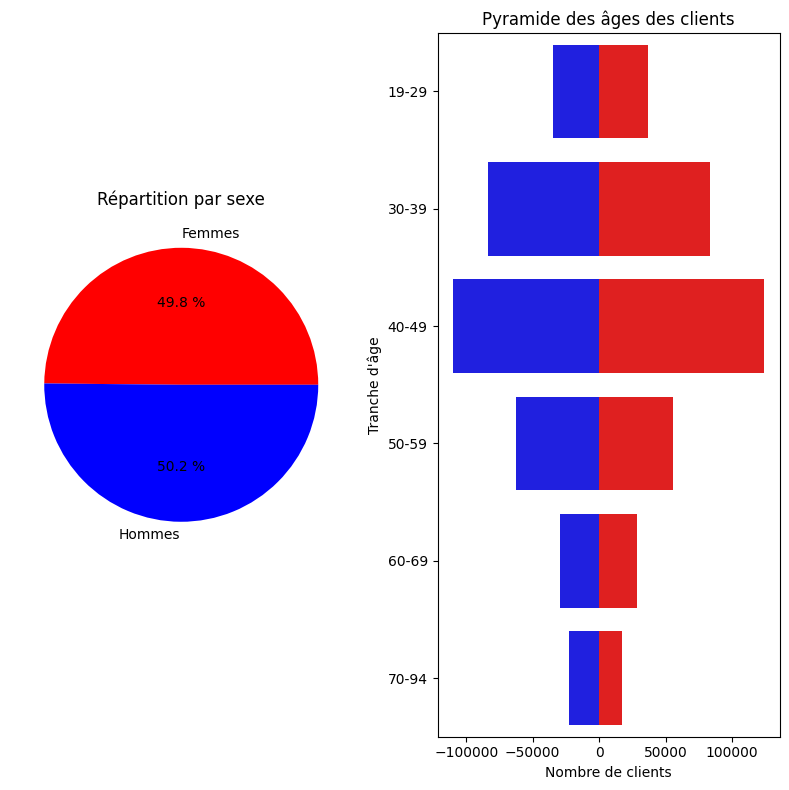

In [280]:
#Créationn de la figure des des axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))

# Répartition par genre
gender_df = merge_df.groupby('sex')['client_id'].count()
colors = ['r', 'b']  # Rouge pour Femmes, Bleu pour Hommes
ax1.pie(gender_df, autopct='%.1f %%', labels=gender_df.index.map({'f': 'Femmes', 'm': 'Hommes'}), colors=colors)
ax1.set_title("Répartition par sexe")

# Pyramide des âges
age_df = merge_df.groupby(['sex', 'groupe_age'])['client_id'].count().unstack(level=0).fillna(0)
age_df['Total'] = age_df['f'] + age_df['m']
age_df['Total cum'] = age_df['Total'].cumsum()
age_df['percent'] = age_df['Total cum'] / age_df['Total'].sum()

sns.barplot( data=age_df, x='m', y=age_df.index, order=age_df.index.unique(), color='Red', orient='h')
sns.barplot( data=age_df, x=-age_df['f'], y=age_df.index, order=age_df.index.unique(), color='Blue', orient='h')
ax2.set_title("Pyramide des âges des clients")
ax2.set_xlabel("Nombre de clients")
ax2.set_ylabel("Tranche d'âge")

#Affichage du graphique
plt.show()


In [281]:
# Calculer de la date actuelle
#aujourdhui = pd.Period(datetime.now(), freq='D')
aujourdhui = pd.Period('2023-11-24', freq='D')
#Calcul de la période écoulée entre dernier_achat et aujourd'hui
df_recency = merge_df.groupby(by='client_id', as_index=False)['Jour'].max()
df_recency.columns = ['client', 'dernier_achat']
recent_date = df_recency['dernier_achat'].max()
df_recency['recence'] = aujourdhui - df_recency['dernier_achat']

#Fonction pour extraire le nombre des chaînes de la forme '<nombre * Days>'
def extraire_nombre(texte):
    nombre = re.search(r'\d+', str(texte))  # Convertit la valeur en chaîne et recherche le premier nombre
    if nombre:
        return int(nombre.group())  # Convertit le résultat en entier
    else:
        return None

#Application de la fonction à la colonne 'recence' pour extraire le nombre
df_recency['recence'] = df_recency['recence'].apply(extraire_nombre)

#Affichage du tableau
df_recency


,client,dernier_achat,recence
0,c_1,2023-01-15,313
1,c_10,2023-01-27,301
2,c_100,2022-09-20,430
3,c_1000,2023-01-24,304
4,c_1001,2023-02-23,274
...,...,...,...
8595,c_995,2022-11-21,368
8596,c_996,2023-02-21,276
8597,c_997,2023-02-05,292
8598,c_998,2023-02-22,275


In [282]:
#Calcul de la fréquence d'achat pour chaque client
df_frequency = merge_df.drop_duplicates().groupby(
    by=['client_id'], as_index=False)['Jour'].count()
df_frequency.columns = ['client', 'frequence']

#Affichage du tableau
df_frequency.head()

,client,frequence
0,c_1,43
1,c_10,58
2,c_100,8
3,c_1000,126
4,c_1001,103


In [283]:
#Calcul du montant d'achat pour chaque client
df_monetary = merge_df.groupby(by='client_id', as_index=False)['price'].sum()
df_monetary.columns = ['client', 'montant']

#Affichage du tableau
df_monetary.head()

,client,montant
0,c_1,629.02
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2291.88
4,c_1001,1823.85


In [284]:
#Jointure des tableaux
rf_df = df_recency.merge(df_frequency, on='client')
rfm_df = rf_df.merge(df_monetary, on='client').drop(
    columns='dernier_achat')

#Affichage du tableau rfm
rfm_df.head()

,client,recence,frequence,montant
0,c_1,313,43,629.02
1,c_10,301,58,1353.60
2,c_100,430,8,254.85
3,c_1000,304,126,2291.88
4,c_1001,274,103,1823.85


In [285]:
#Classement
rfm_df['R_rank'] = rfm_df['recence'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequence'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['montant'].rank(ascending=True)

#Normalisation du rang de chaque client
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

#Suppression des colonnes R_rank, F_rank et M_rank
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

#Affichage du tabelau
rfm_df.head()

,client,recence,frequence,montant,R_rank_norm,F_rank_norm,M_rank_norm
0,c_1,313,43,629.02,24.486874,41.325581,41.325581
1,c_10,301,58,1353.60,32.309069,54.651163,54.651163
2,c_100,430,8,254.85,4.642005,3.651163,3.651163
3,c_1000,304,126,2291.88,29.826969,83.191860,83.191860
4,c_1001,274,103,1823.85,78.902148,77.139535,77.139535


In [286]:
#Calcul des scores pour chaque client
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

#Affichage du tabelau
rfm_df[['client', 'RFM_Score']].head(7)

,client,RFM_Score
0,c_1,1.94
1,c_10,2.56
2,c_100,0.19
3,c_1000,3.76
4,c_1001,3.87
5,c_1002,1.94
6,c_1003,3.78


In [287]:
#Classification des clients en fonction de leurs scores
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))

#Affichage du tableau
rfm_df[['client', 'RFM_Score', 'Customer_segment']].head(20)

,client,RFM_Score,Customer_segment
0,c_1,1.94,Low Value Customers
1,c_10,2.56,Low Value Customers
2,c_100,0.19,Lost Customers
3,c_1000,3.76,Medium Value Customer
4,c_1001,3.87,Medium Value Customer
5,c_1002,1.94,Low Value Customers
6,c_1003,3.78,Medium Value Customer
7,c_1004,3.21,Medium Value Customer
8,c_1005,2.90,Low Value Customers
9,c_1006,4.67,Top Customers


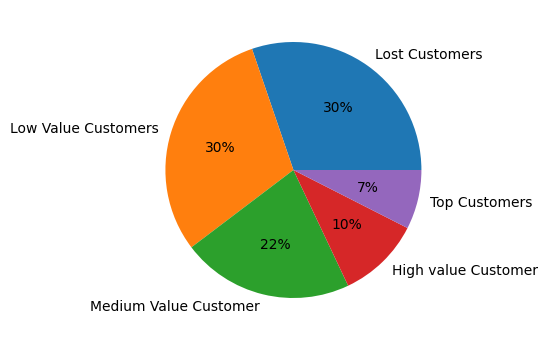

In [288]:
#Réalisation du graphique
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')

#Affichage du graphique
plt.show()

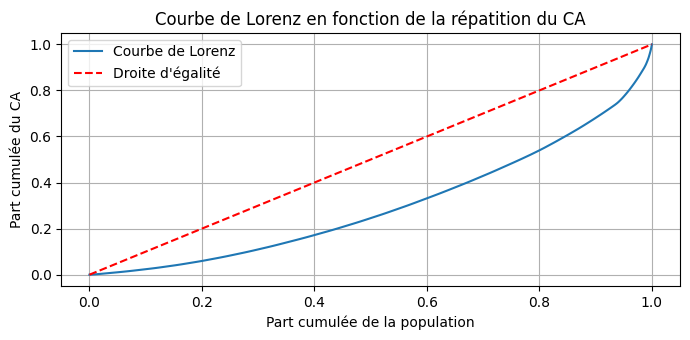

In [289]:
#Réalisation de la courbe de Lorenz
n = len(merge_df['price'])
lorenz = np.cumsum(np.sort(merge_df['price'])) / merge_df['price'].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

#Traçage de la courbe de Lorenz
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Courbe de Lorenz')

#Traçage de la ligne d'égalité
equality_line = np.linspace(0, 1, n+1)
plt.plot(xaxis, equality_line, linestyle='--', color='red', label="Droite d'égalité")

#Ajout des labels et une légende
plt.xlabel('Part cumulée de la population')
plt.ylabel('Part cumulée du CA')
plt.title('Courbe de Lorenz en fonction de la répatition du CA')
plt.legend()
plt.grid()

#Affichage du graphique
plt.show()

In [290]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.39348534920413847

Le coefficient de gini et la courbe de Lorenz montre l'inégalité qui existe entre la répartition du chiffre d'affaires par individus. On constate que la courbe est relativement éloigné de la droite d'égalité, il y a donc une inégalité importante. On observe également une correction de la courbe de Lorenz à partir de 90 % de la part cumulée de la population celà montre qu'il y a des ventes dont le montant est plus important que le reste des ventes.

## **Etape 7 - Analyse des corrélations et tests statistiques**

Vérifions si les données suivent une distribution normale à l'aide du test de Kolmogorov-Smirnov

In [291]:
from scipy.stats import kstest

data = merge_df['price']

# Test de Kolmogorov-Smirnov
statistic, p_value = kstest(data, 'norm', alternative='two-sided')

# Afficher les résultats
print(f'Statistique de test : {statistic}')
print(f'P-value : {p_value}')

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")


Statistique de test : 0.9963608601166387
P-value : 0.0
Les données ne suivent pas une distribution normale (on rejette H0)


In [292]:
#Affichage du top 10 des clients
merge_df.groupby('client_id')['price'].sum().nlargest(10)

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64

In [293]:
#Création d'une liste contenant les 4 plus gros clients
top_4_clients = list(merge_df.groupby('client_id')['price'].sum().nlargest(4).index)

**A - Lien entre le sexe des clients et les catégories des livres achetés**

In [294]:
#Création du tableau de contingence
sex_contingency = pd.crosstab(merge_df["sex"], merge_df["categ"])
#Affichage du tableau
sex_contingency

categ,0,1,2
sex,,,
f,206103,119307,17283
m,209356,116285,19200


In [295]:
#Transposition du tableau
sex_contingency = pd.crosstab(merge_df["sex"], merge_df["categ"])
#Affichage du tableau
sex_contingency

categ,0,1,2
sex,,,
f,206103,119307,17283
m,209356,116285,19200


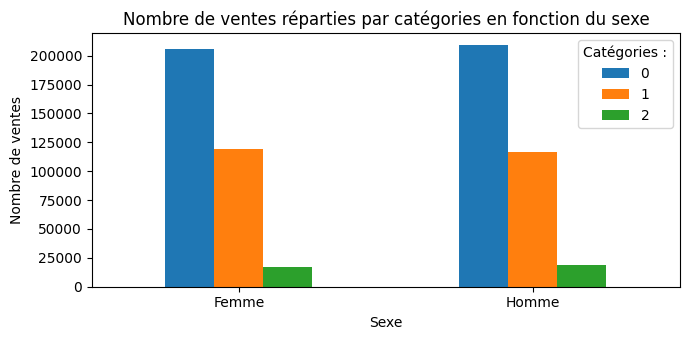

In [296]:
#Réalisation du graphique
ax = sex_contingency.plot.bar()

#Titre des axes et légendes
ax.set_xticklabels(["Femme", "Homme"], rotation=0)
ax.set_xlabel('Sexe')

ax.set_ylabel('Nombre de ventes')

ax.legend(title='Catégories :')

ax.set_title('Nombre de ventes réparties par catégories en fonction du sexe')

#Affichage du graphique
plt.show()

In [297]:
from scipy.stats import chi2_contingency

# Effectuer le test du Chi²
chi2, pval, ddl, _ = chi2_contingency(sex_contingency)

# Afficher les résultats
print("Le chi2 est de :", chi2)
print("Le degré de liberté est de :", ddl)
print("La p-value est de :", pval)

# Interpréter les résultats du test du Chi²
if pval > 0.05:
    print("L'hypothèse H0 est retenue, les variables sont indépendantes.")
else :
    print("L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que le sexe du client a un impact sur le genre de livres qu'il achète.")



Le chi2 est de : 158.25417617304882
Le degré de liberté est de : 2
La p-value est de : 4.3205822283997063e-35
L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que le sexe du client a un impact sur le genre de livres qu'il achète.


Confirmons notre hypothèse avec un test de Student :

In [298]:
#Calcul du montant total par rapport au sexe
f = merge_df[merge_df["sex"]=="f"].groupby("client_id")["price"].sum()
m = merge_df[merge_df["sex"]=="m"].groupby("client_id")["price"].sum()

#Affichage des résultats
st.ttest_ind(f, m)

TtestResult(statistic=-1.3000005414890667, pvalue=0.19363563225665878, df=8598.0)

**B - Lien entre l'âge des clients et le montant total des achats**

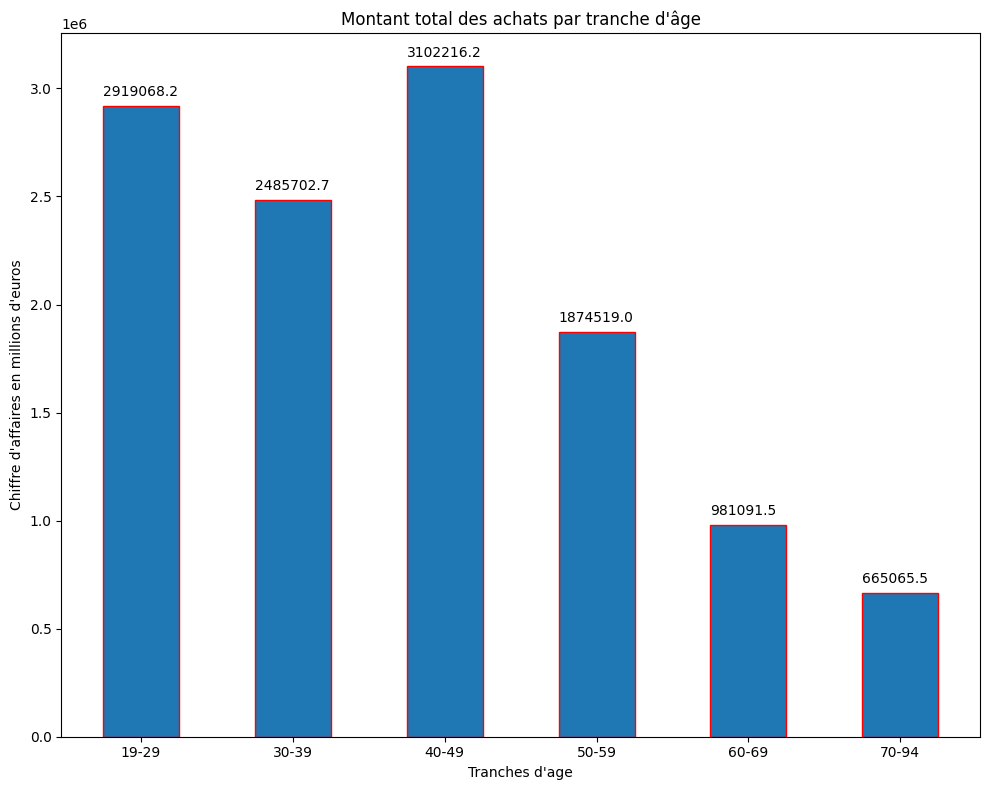

In [299]:
#Réalisation du graphique
plt.subplots(figsize=(10,8))
groupe_age = ['19-29', '30-39', '40-49', '50-59', '60-69','70-94']
totals = round(merge_df.groupby("groupe_age")["price"].sum(), 1)
plt.bar(groupe_age, totals, width= 0.5, align='center', edgecolor = 'red')
i = 1
j = 45000

#Titre des axes et légende
for i in range(len(groupe_age)):
    plt.annotate(totals[i], (-0.25+i, totals[i] + j))

plt.title("Montant total des achats par tranche d'âge")
plt.xlabel("Tranches d'age")
plt.ylabel("Chiffre d'affaires en millions d'euros")

#Affichage du graphique
plt.show()

In [300]:
#Test de pearson
x = merge_df['age']
y = merge_df['price']
corr, p = st.spearmanr(x, y)

#Affichage des résultats
print("Le test de pearson est de :", corr)
print("La p-value est de :", pval)

#Interprétation des résultats du test de spearman
if pval > 0.05:
    print("L'hypothèse H0 est retenue, les variables sont indépendantes.")
else :
    print("L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que l'âge a un impacte sur le montant total d'achat.")

Le test de pearson est de : -0.055464894621283026
La p-value est de : 4.3205822283997063e-35
L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que n peut dire que l'âge a un impacte sur le montant total d'achat.


**C - Lien entre l'âge des clients et la fréquence d’achat**


In [301]:
#Création du dataframe freq_df en enlevant les 4 plus gros clients
freq_df = merge_df.loc[~merge_df['client_id'].isin(top_4_clients)]

#Filtrage des données
freq_df = (freq_df.groupby(['client_id', 'age'], as_index=False).agg({'price': 'sum', 'session_id': 'nunique'}))

#Calcul de la fréquence
freq_df = freq_df.rename(columns={'price': 'ca', 'session_id': 'frequence'})

#Calcul du panier moyen
freq_df['panier_moyen'] = (freq_df['ca'] / freq_df['frequence'])


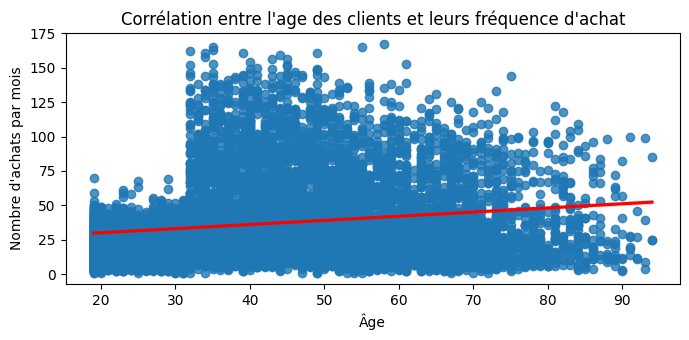

In [302]:
#Réalisation du graphique

#Création de la figure
plt.figure()

#Titre des axes
plt.title("Corrélation entre l'age des clients et leurs fréquence d'achat")
sns.regplot(data=freq_df, x='age', y='frequence', line_kws={"color": "red"})
plt.ylabel("Nombre d'achats par mois")
plt.xlabel("Âge")

#Affichage du graphique
plt.show()

In [303]:
#Test de pearson
x = freq_df['age']
y = freq_df['frequence']
corr, p = st.spearmanr(x, y)

#Affichage des résultats
print("Le test de pearson est de :", corr)
print("La p-value est de :", pval)

#Interprétation des résultats du test de spearman
if pval > 0.05:
    print("L'hypothèse H0 est retenue, les variables sont indépendantes.")
else :
    print("L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que l'âge a un impacte sur la fréquence d'achat.")

Le test de pearson est de : 0.21196373259671872
La p-value est de : 4.3205822283997063e-35
L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que l'âge a un impacte sur la fréquence d'achat.


**D - Lien entre l'âge des clients et la taille du panier moyen**

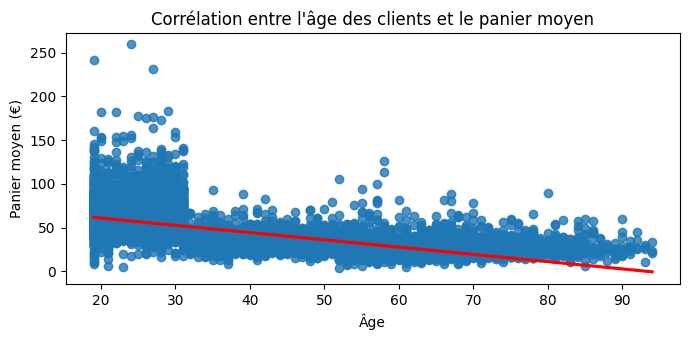

In [304]:
#Données du graphique
x = freq_df['age']
y = freq_df['panier_moyen']

#Création de la figure
plt.figure()

#Titre des axes
plt.title("Corrélation entre l'âge des clients et le panier moyen")
sns.regplot(data=freq_df, x='age', y='panier_moyen', line_kws={"color": "red"})
plt.ylabel("Panier moyen (€)")
plt.xlabel("Âge")

#Affichage du graphique
plt.show()

In [305]:
#Test de pearson
x = freq_df['age']
y = freq_df['panier_moyen']
corr, p = st.spearmanr(x, y)

#Affichage des résultats
print("Le test de pearson est de :", corr)
print("La p-value est de :", pval)

#Interprétation des résultats du test de spearman
if pval > 0.05:
    print("L'hypothèse H0 est retenue, les variables sont indépendantes.")
else :
    print("L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que l'âge a un impacte sur le montant du panier moyen.")

Le test de pearson est de : -0.7005505466475987
La p-value est de : 4.3205822283997063e-35
L'hypothèse H1 est retenue, les variables ne sont pas indépendantes. C'est à dire que l'âge a un impacte sur le montant du panier moyen.


**E - Lien entre l'âge des clients et la catégorie des
livres achetés**

In [306]:
#Création du tableau de contingence
contingency = merge_df.loc[~merge_df['client_id'].isin(top_4_clients)]
contingency = pd.crosstab(contingency["groupe_age"], contingency["categ"])

#Affichage du tableau
contingency

categ,0,1,2
groupe_age,,,
19-29,14408,25741,25760
30-39,119972,41628,4696
40-49,156851,50901,758
50-59,54250,47232,735
60-69,24801,32685,550
70-94,16999,22418,349


In [307]:
#Transposition du tableau
pd.crosstab(merge_df.groupe_age,merge_df.categ).apply(lambda r:r/r.sum(), axis=1)

categ,0,1,2
groupe_age,,,
19-29,0.202612,0.388804,0.408584
30-39,0.721436,0.250325,0.028239
40-49,0.756177,0.240538,0.003285
50-59,0.526669,0.464398,0.008933
60-69,0.427338,0.563185,0.009477
70-94,0.427476,0.563748,0.008776


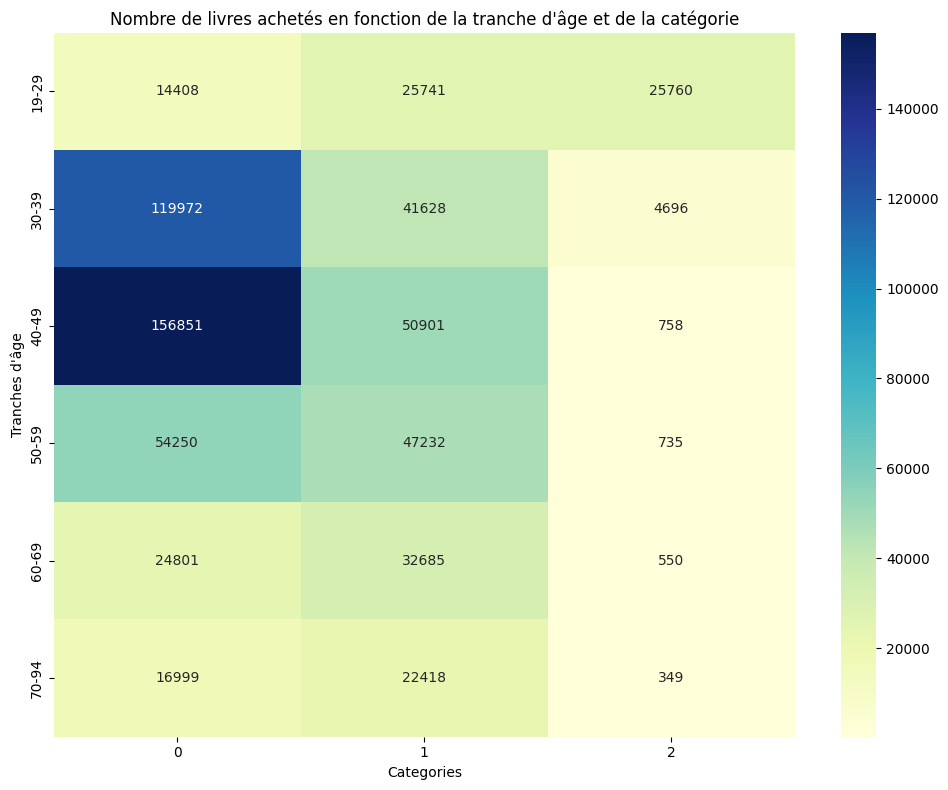

In [308]:
#Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10,8))

#Réalisation du graphique
sns.heatmap(contingency, annot=True, fmt='.0f', cmap="YlGnBu")

#Titre des axes
plt.title("Nombre de livres achetés en fonction de la tranche d'âge et de la catégorie")
plt.xlabel("Categories")
plt.ylabel("Tranches d'âge"),
labels = groupe_age
ax.set_yticklabels(labels)

#Affichage du graphique
plt.show()

In [309]:
from scipy.stats import levene

#Analysons les 3 échantillions : catégorie 0, catégorie 1, catégorie 2
statistic, pvalue = levene(merge_df.loc[merge_df['categ']==0,'age'], merge_df.loc[merge_df['categ']==1,'age'], merge_df.loc[merge_df['categ']==2,'age'])

print("Statistique de Levene :", statistic)
print("P-value :", pvalue)

#Interprétation des résultats
if pvalue > 0.05:
    print("Les variances sont homogènes (H0 est retenue).")
else:
    print("Les variances ne sont pas homogènes (H1 est retenue).")


Statistique de Levene : 26975.654952050325
P-value : 0.0
Les variances ne sont pas homogènes (H1 est retenue).


Nous observons que les variances des différents groupe ne son pas homogênes. Les conditions ne sont pas remplies pour effectuer un test ANOVA c'est pourquoi il est nécessaire d'effectuer un test non-paramétrique : Kruskal-Wallis.

In [310]:
#Test de Kruskal-Wallis
statistic, pvalue = st.kruskal(merge_df.loc[merge_df['categ']==0,'age'], merge_df.loc[merge_df['categ']==1,'age'], merge_df.loc[merge_df['categ']==2,'age'])

print("Statistique de Levene :", statistic)
print("P-value :", pvalue)

#Interprétation des résultats
if pvalue > 0.05:
    print("Les variances sont homogènes (H0 est retenue).")
else:
    print("Les médianes ne sont pas homogènes (H1 est retenue).")

Statistique de Levene : 78458.43837285662
P-value : 0.0
Les médianes ne sont pas homogènes (H1 est retenue).


In [311]:
#Test ANOVA
statistic, pvalue = st.f_oneway(merge_df.loc[merge_df['categ']==0,'age'], merge_df.loc[merge_df['categ']==1,'age'], merge_df.loc[merge_df['categ']==2,'age'])

print("Statistique de Levene :", statistic)
print("P-value :", pvalue)

#Interprétation des résultats
if pvalue > 0.05:
    print("Les variances sont homogènes (H0 est retenue).")
else:
    print("Les moyennes ne sont pas homogènes (H1 est retenue).")

Statistique de Levene : 45120.03553567384
P-value : 0.0
Les moyennes ne sont pas homogènes (H1 est retenue).


Les tests rejettent l'hypothèse d'une indépendance entre entre l'âge et la catégorie de livre acheté. Donc l'âge a une influence sur le type de livre que le client va acheter.

## **Etape 8 - Conclusions**

Depuis l'ouverture de la boutique de e-commerce, le chiffre d'affaire de La page s'est élevé à plus de 12 millions d'euros.

Le Chiffre d'affaire a augmenté de plus de 23 % en 2022. Nous constatons que ce fut une bonne décision de lancer une boutique de librairie en e-commerce car il existe bel et bien un marché.

Cependant ce succès grandissant est à relativiser car la moyenne mobile nous montre que le chiffre d'affaires est soumis aux saisonalités. Effectivement régulièrement aux mois de Juin, Janvier, Février et Novembre on constate des baisses du chiffre d'affaires.

Les catégories des produits qui rencontrent le plus de succès sont respectivements : 1 (avec 40% des ventes), 0 (avec 36% des ventes) et 2 (23 % des ventes).

Concernant la répartition des clients on constate qu'il y a autant de femme que d'hommes et en ce qui concerne l'âge des clients, les 30 à 60 ans sont les plus nombreux. Parmsi ces clients 10% d'entre eux sont des clients à forte valeur pour nous.

Enfin les tests statistiques montrent que l'âge et le sexe a un impacte sur la catégorie de livre que le client va acheter.